## **Trabajo Práctico Individual n° 1: Exploratory Data Analysis**
____
__Universidad Tecnológica Nacional, Buenos Aires__\
__Ingeniería Industrial__\
__Ciencia de Datos - Curso I5521__
____

- Nombre:olivia
- Apellido:alvarez rosato
- Legajo:1675620

En este trabajo práctico aplicaremos algunas técnicas aprendidas para el análisis exploratorio de datos.

Este conjunto de datos procede del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene o no diabetes, basándose en determinadas mediciones diagnósticas incluidas en el conjunto de datos. La selección de estas instancias de una base de datos más amplia está sujeta a varias restricciones como por ejemplo se trata de pacientes mujeres. 

Los conjuntos de datos constan de varias variables médicas predictoras y una variable objetivo, el resultado. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, su nivel de insulina, su edad, etc.

#### Variables:
- Pregnancies: Número de embarazos
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba de tolerancia a la glucosa oral
- BloodPressure: Presión arterial diastólica (mm Hg)
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm)
- Insulin: Insulina sérica de 2 horas (mu U/ml)
- BMI: Índice de masa corporal (peso en kg/(altura en m)^2)
- DiabetesPedigreeFunction: Función del pedigrí de la diabetes
- Age: Edad (años)
- Outcome: Variable de clase (0 o 1) 1 para personas diabéticas, 0 para las que no lo son.

## **Objetivos del trabajo practico**
- resolver los requisitos que se detallan en las proximas celdas
- dejar comentarios # en cada linea de codigo que se agregue
- fecha limite de entrega: 28 de Septiembre 2022 a las 23h59

In [1]:
#Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### **Objetivo 1**
Lo primero que deberan hacer será importar
- el dataset
- corroborar que lo hayamos cargado correctamente.

In [2]:
# importo el dataset con Pandas
diabetes = pd.read_csv('ClusterAI_TP_dataset_diabetes.csv', delimiter=',')

##### **Objetivo 2**
Ahora imprimir también las dimensiones del dataset

In [3]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#veo la dimension
diabetes.shape

(768, 9)

##### **Objetivo 3**
Mostrar los nombres de cada columna, el tipo de dato que contiene cada una de ellas y la cantidad de nulos presentes.

In [5]:
# PISTA: con una sola línea de código podríamos obtener toda esta información
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### **Objetivo 4**
Mostrar como se distribuye la variable "Outcome".

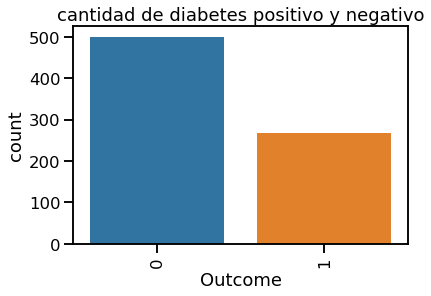

In [6]:
#uso countplot de seaborn y genero un grafico de barras para ver distribucion de "OUTCOME"
sns.set_context("talk")
outcome=sns.countplot(x=diabetes["Outcome"])
plt.xticks(rotation=90)
plt.title("cantidad de diabetes positivo y negativo")
plt.show()

#se encuentra una mayor cantidad de no diabeticos en el dataset

##### **Objetivo 5**
Obtener algunas métricas estadísticas de todas las variables numéricas del dataset por ejemplo, media, maximo, minimo, desvio estandar entre otros. 

In [7]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### **Objetivo 6**
Imprimir un pairplot del dataframe en función de la variable "Outcome". Podemos sacar alguna rápida conclusión de lo observado? Cuál?

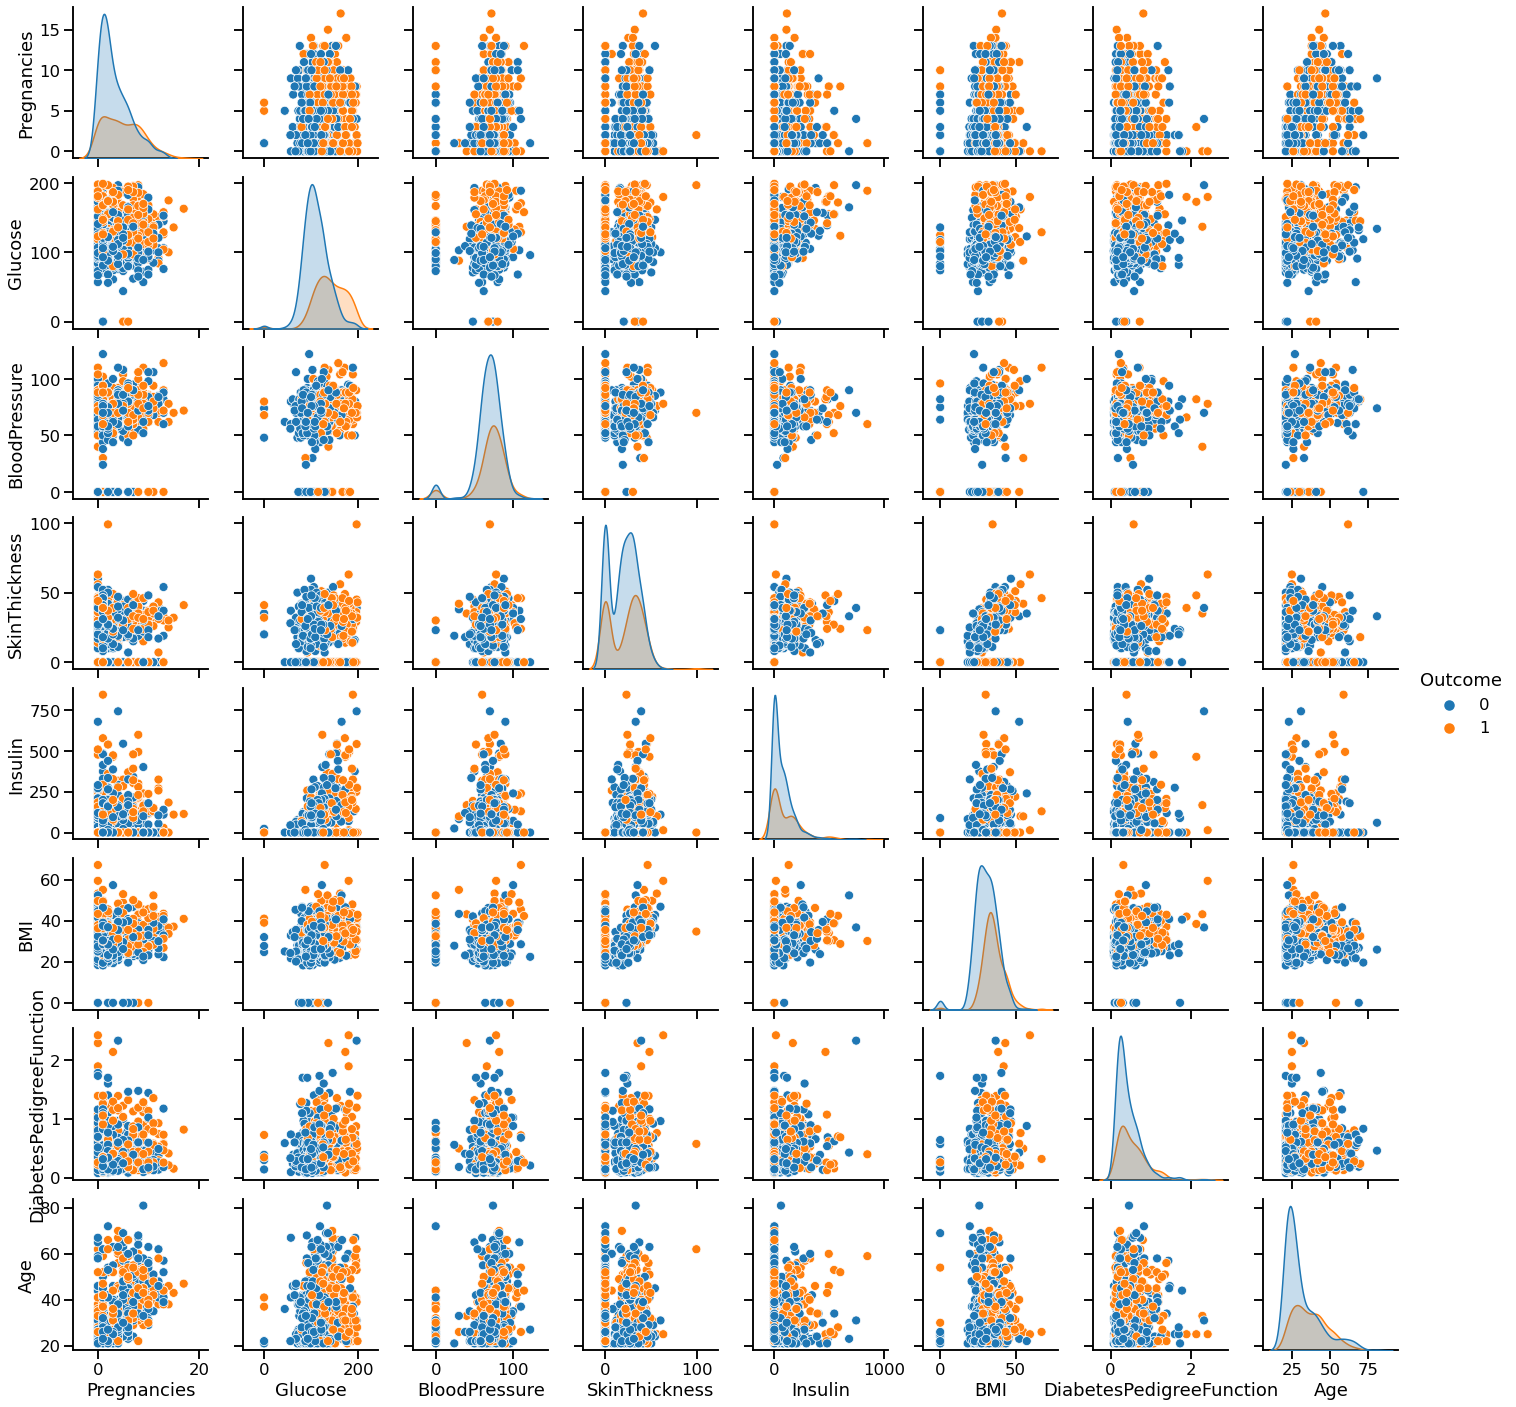

In [8]:
sns.pairplot(diabetes,hue="Outcome")

#se puede ver como la glucosa es una variabla intimamente ligada al diabetes. la otra variable que se pueden ver relaciones con el diabetes pero en menor medida que la glucosa es BMI

##### **Objetivo 7**

Analizar la correlación lineal de las variables.

- Cuales son los dos pares de variables más correlaciondas? 
- Que valor y tipo de correlación tienen?
- Podríamos tomar alguna decisión con respecto a esto? Cuál?

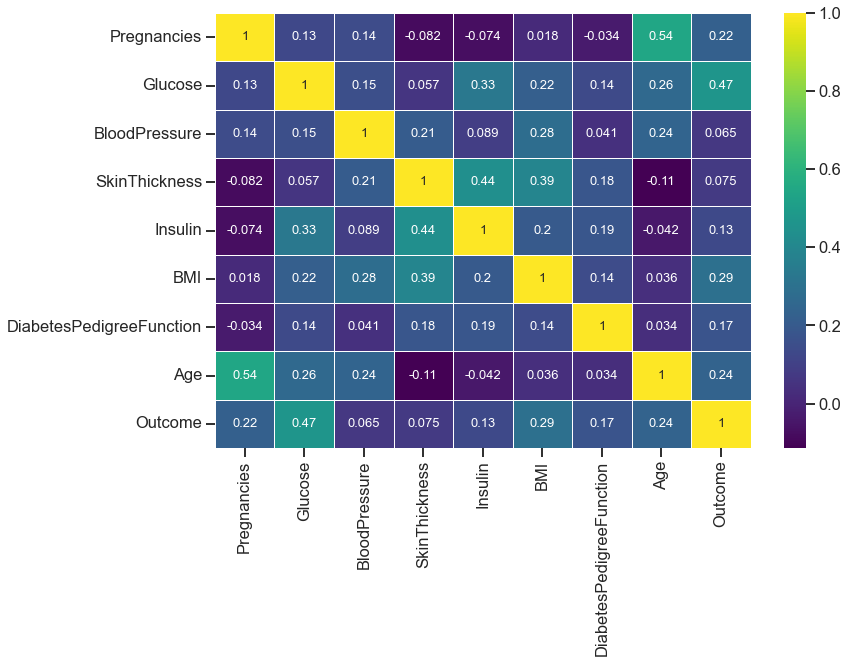

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#primero hago un mapa de color de las variables para visualizar mejor
plt.figure(figsize=(12,8))

sns.set_style("white")
sns.set_context("talk")
sns.set_style("ticks")
sns.heatmap(diabetes.corr(),annot=True,linewidths=.5,annot_kws={'size':13},cmap="viridis")
plt.show()

#luego imprimo una tabla de correlacion de las variables
diabetes.corr()

#los dos pares de variables mas correlacionadas son pregnacies y age
#el valor es de 0,54
#las variables que se correlacionan con el diabetes son edad y bmi tal como se ha predecido antes con 0,47 y 0,29


##### **Objetivo 8**
Hacer un histograma de la variable BMI

<Figure size 864x576 with 0 Axes>

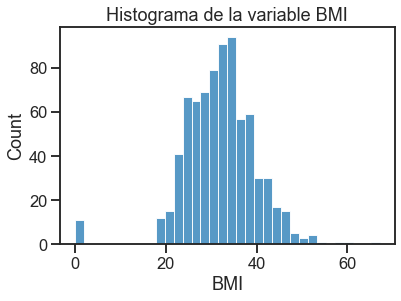

<Figure size 864x576 with 0 Axes>

In [10]:
sns.histplot(diabetes["BMI"])
plt.title("Histograma de la variable BMI")
plt.figure(figsize=(12,8))

##### **Objetivo 9**
Se pueden ver algun valor extrano en la distribución de la variable BMI?
Realizar un boxplot para corroborar esto.

/Users/oliviaalvarezrosato/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot para identificar outlier en variable BMI')

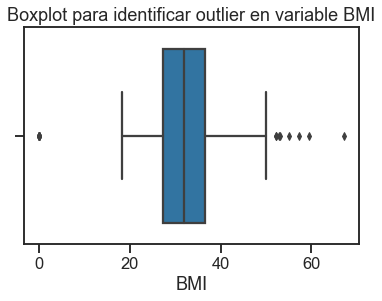

In [11]:
#Primero visualizo los outliers de BMI
sns.boxplot(diabetes['BMI'])
plt.title("Boxplot para identificar outlier en variable BMI")

#se observan valores extra;os

##### **Objetivo 10**
Filtrar el dataset para eliminar los valores que consideremos atípicos de la variable BMI.

/Users/oliviaalvarezrosato/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

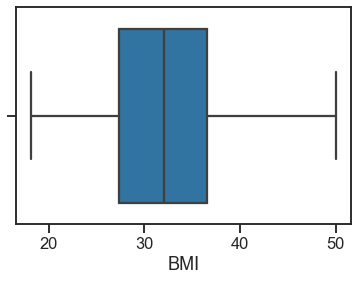

In [12]:
#Luego quito los outliers
valor_max=diabetes["BMI"].quantile(0.99)
valor_min=diabetes["BMI"].quantile(0.01)

#df=diabetes[diabetes["BMI"]<valor_max]

sns.boxplot(diabetes[(diabetes["BMI"]< valor_max) & (diabetes["BMI"]>valor_min)]["BMI"])


##### **Objetivo 11**

Hacer un boxplot de la distribución de la "Glucosa" segun el tipo de paciente de la variable "Outcome". Es decir que hay que visualizar un boxplot de la variable "Glucosa" por cada categoria de la variable "Outcome".

Que podemos observar?

<Figure size 864x576 with 0 Axes>

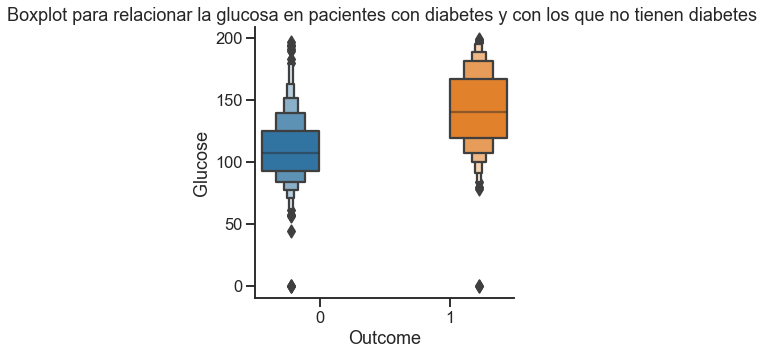

<Figure size 864x576 with 0 Axes>

In [13]:
#uso un catplot para armar un boxplot de glucosa segun tipo de paciente
sns.catplot(data=diabetes, x="Outcome", y="Glucose", hue="Outcome", kind="boxen",width=0.9)
plt.title("Boxplot para relacionar la glucosa en pacientes con diabetes y con los que no tienen diabetes ")
plt.figure(figsize=(12,8))

#glucosa esta relacionada con diabetes, a mayor glucosa paciente diabetico. y Viveversa

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

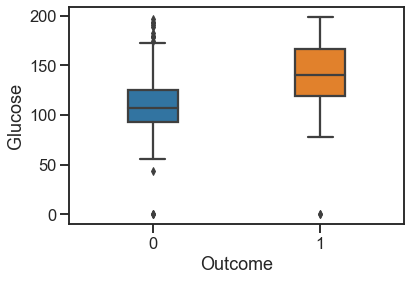

In [14]:
#uso boxplot replicando

sns.boxplot(data=diabetes, x="Outcome", y="Glucose",width=0.3)

##### **Objetivo 12**
Hacer un Scatterplot donde se muestre como se distribuye la Glucosa y la Presión sanguínea según el tipo de paciente.

Se puede ver alguna relación? Cuál?

<Figure size 864x576 with 0 Axes>

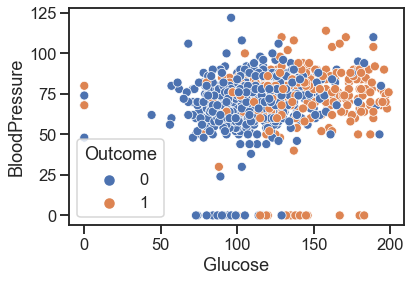

<Figure size 864x576 with 0 Axes>

In [15]:
markers = {"0": "s", "1": "X"}
sns.scatterplot(data=diabetes, x="Glucose", y="BloodPressure", hue="Outcome", palette="deep",markers=markers)
plt.figure(figsize=(12,8))

#hay una estrecha relacion entre las personas que tienen diabetes y glucosa alta. La presion en sangre no parece ser una variable determinante en la diabetes

##### **Objetivo 13**
Crear una nueva variable de rangos de edades de tipo texto/ string dividiendolo de la siguiente manera:

- Primer rango de edad menor a 30 años
- Segundo rango de edad entre 30 y 40 años.
- Tercer rango de edad mayor a 40 años

In [16]:
#Primero defininmos los limites de cada categoria y creamos la columna 'RangoAge'

diabetes.loc[(diabetes['Age'] < 30), 'RangoAge'] = 'Mas jovenes'
diabetes.loc[(diabetes['Age'] > 30) & (diabetes['Age'] <= 40), 'RangoAge'] = 'Adultos'
diabetes.loc[(diabetes['Age'] > 40), 'RangoAge']   = 'Mas adultos'
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,RangoAge
0,6,148,72,35,0,33.6,0.627,50,1,Mas adultos
1,1,85,66,29,0,26.6,0.351,31,0,Adultos
2,8,183,64,0,0,23.3,0.672,32,1,Adultos
3,1,89,66,23,94,28.1,0.167,21,0,Mas jovenes
4,0,137,40,35,168,43.1,2.288,33,1,Adultos


##### **Objetivo 14**
Hacer un count plot que cuente la cantidad de pacientes diabéticos y no diabéticos por rango etario.

Podemos extraer alguna conclusión al respecto? Cuál?

<AxesSubplot:xlabel='RangoAge', ylabel='count'>

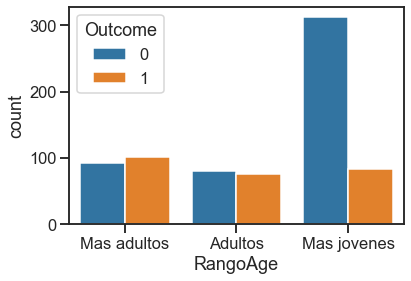

In [17]:
sns.countplot(data=diabetes, x="RangoAge", hue="Outcome")

In [18]:
#Las personas mas jovenes poseen en menor cantidad diabetes. A partir de 0 anios aumenta esta enfermedad